In [1]:
import pandas as pd
marathon = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/marathon/marathon.csv")
marathon.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


In [2]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37250 entries, 0 to 37249
Data columns (total 4 columns):
age       37250 non-null int64
gender    37250 non-null object
split     37250 non-null object
final     37250 non-null object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


In [3]:
import datetime
def convert_time(s):
    h,m,s = map(int, s.split(":"))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

In [4]:
marathon = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/marathon/marathon.csv", 
                       converters={"split":convert_time, "final":convert_time})

marathon.dtypes

age                 int64
gender             object
split     timedelta64[ns]
final     timedelta64[ns]
dtype: object

In [5]:
d = datetime.timedelta(hours=1,minutes=0,seconds=0)
df = pd.DataFrame({'time':[d]})
df.astype(int)

,time
0,3600000000000


In [6]:
d = datetime.timedelta(hours=1,minutes=0,seconds=0)
df = pd.DataFrame({'time':[d]})
df.astype(int) * 1e-9

,time
0,3600.0


In [7]:
# 将split和final的特征值转化为秒为单位的整数
marathon['split_sec'] = marathon['split'].astype(int) * 1e-9
marathon['final_sec'] = marathon['final'].astype(int) * 1e-9
marathon.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,01:05:38,02:08:51,3938.0,7731.0
1,32,M,01:06:26,02:09:28,3986.0,7768.0
2,31,M,01:06:49,02:10:42,4009.0,7842.0
3,38,M,01:06:16,02:13:45,3976.0,8025.0
4,31,M,01:06:32,02:13:59,3992.0,8039.0


In [8]:
marathon.describe()

,age,split,final,split_sec,final_sec
count,37250.000000,37250,37250,37250.000000,37250.000000
mean,40.697369,0 days 02:03:54.425664,0 days 04:48:09.303597,7434.425664,17289.303597
std,10.220043,0 days 00:22:55.093889,0 days 01:03:32.145345,1375.093890,3812.145345
min,17.000000,0 days 01:05:21,0 days 02:08:51,3921.000000,7731.000000
25%,33.000000,0 days 01:48:25,0 days 04:02:24,6505.000000,14544.000000
50%,40.000000,0 days 02:01:13,0 days 04:44:25,7273.000000,17065.000000
75%,48.000000,0 days 02:16:11,0 days 05:27:36,8171.000000,19656.000000
max,86.000000,0 days 04:59:49,0 days 10:01:08,17989.000000,36068.000000


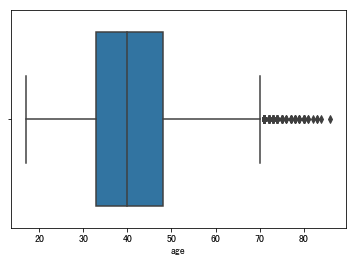

In [9]:
%matplotlib inline
import seaborn as sns
ax = sns.boxplot(x=marathon['age'])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


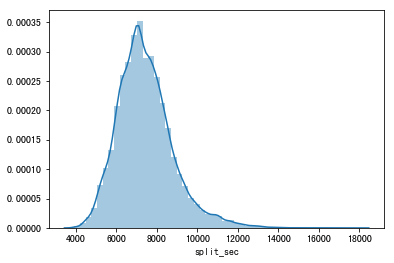

In [10]:
sns.distplot(marathon['split_sec'])

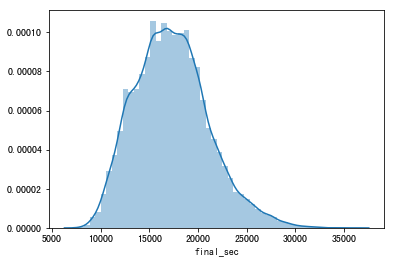

In [11]:
sns.distplot(marathon['final_sec'])

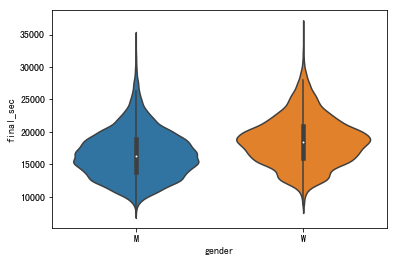

In [12]:
sns.violinplot(x='gender', y='final_sec', data=marathon)

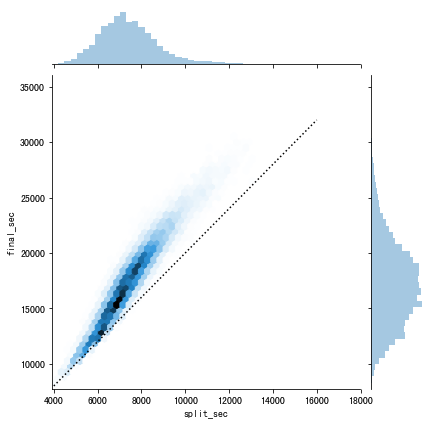

In [13]:
g = sns.jointplot("split_sec", "final_sec", data=marathon, kind='hex')   #or: kind='scatter'

#绘制一条直线，作为参考
import numpy as np
g.ax_joint.plot(np.linspace(4000, 16000), np.linspace(8000, 32000), ":k")   

In [14]:
marathon['split_frac'] = 1 - 2 * marathon['split_sec'] / marathon["final_sec"]
marathon.head()

,age,gender,split,final,split_sec,final_sec,split_frac
0,33,M,01:05:38,02:08:51,3938.0,7731.0,-0.018756
1,32,M,01:06:26,02:09:28,3986.0,7768.0,-0.026262
2,31,M,01:06:49,02:10:42,4009.0,7842.0,-0.022443
3,38,M,01:06:16,02:13:45,3976.0,8025.0,0.009097
4,31,M,01:06:32,02:13:59,3992.0,8039.0,0.006842


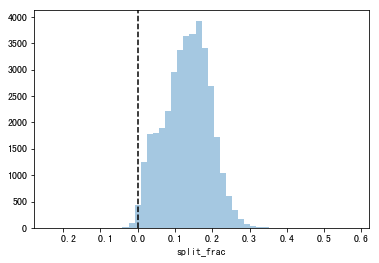

In [15]:
import matplotlib.pyplot as plt
sns.distplot(marathon['split_frac'], kde=False)
plt.axvline(0, color='k', linestyle="--")   # 垂直于x轴的直线，0表示x轴位置

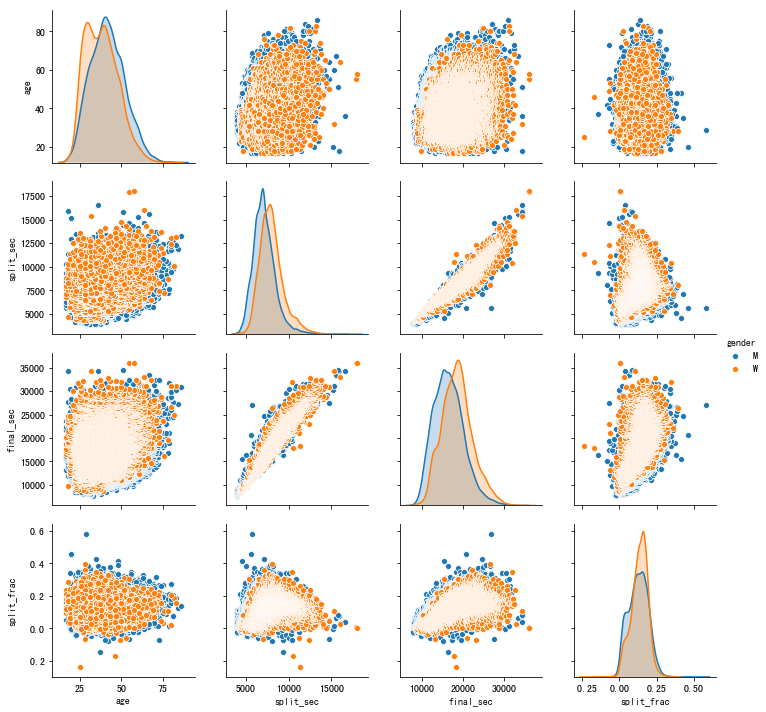

In [16]:
sns.pairplot(data=marathon, 
             vars=['age', 'split_sec', 'final_sec', 'split_frac'], 
             hue='gender')

In [17]:
(marathon.age >= 80).sum()

15

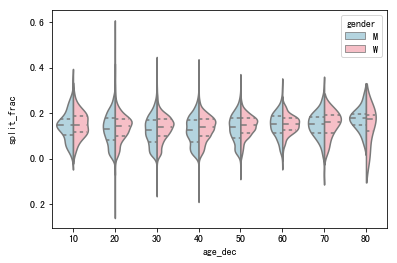

In [18]:
marathon['age_dec'] = marathon['age'].map(lambda age: 10 * (age // 10))
sns.violinplot(x="age_dec", y="split_frac", hue="gender", data=marathon, 
               split=True, inner='quartile', palette=['lightblue', 'lightpink'])

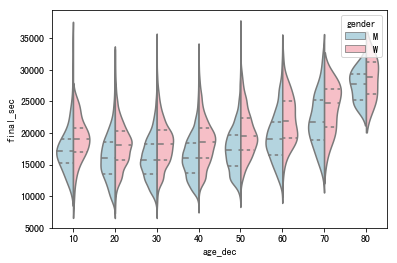

In [19]:
sns.violinplot(x="age_dec", y="final_sec", hue="gender", data=marathon, 
               split=True, inner='quartile', palette=['lightblue', 'lightpink'])

In [20]:
pokemon = pd.read_csv("/Users/qiwsir/Documents/Codes/DataSet/pokemon/pokemon.csv", 
                      index_col=0, encoding='cp1252')
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


In [21]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 1 to 151
Data columns (total 12 columns):
Name         151 non-null object
Type 1       151 non-null object
Type 2       67 non-null object
Total        151 non-null int64
HP           151 non-null int64
Attack       151 non-null int64
Defense      151 non-null int64
Sp. Atk      151 non-null int64
Sp. Def      151 non-null int64
Speed        151 non-null int64
Stage        151 non-null int64
Legendary    151 non-null bool
dtypes: bool(1), int64(8), object(3)
memory usage: 14.3+ KB


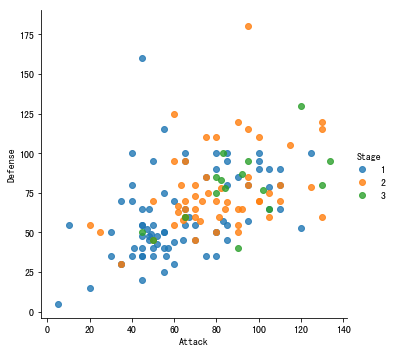

In [22]:
sns.lmplot(x='Attack', y='Defense', data=pokemon, fit_reg=False, hue='Stage')

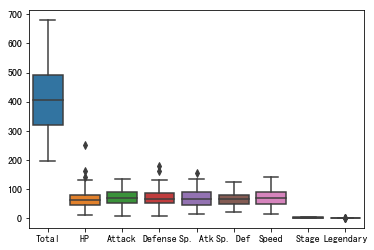

In [23]:
sns.boxplot(data=pokemon)

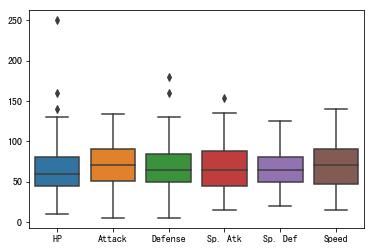

In [24]:
stats_pokemon = pokemon.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data=stats_pokemon)

In [25]:
pokemon['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon'], dtype=object)

Text(0.5, 1.0, 'Attack by Type')

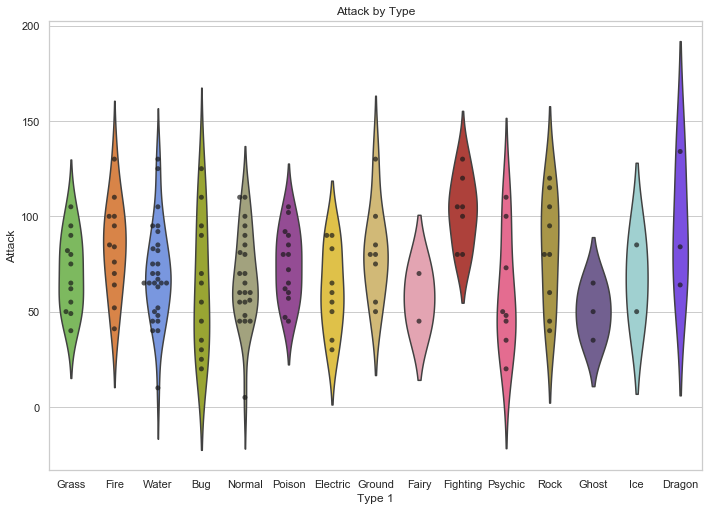

In [26]:
sns.set(style='whitegrid', rc={'figure.figsize':(11.7,8.27)}) 
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]
sns.violinplot(x="Type 1", y='Attack', 
               data=pokemon, 
               inner = None, # 移除提琴图中的竖棒
               palette=pkmn_type_colors)
sns.swarmplot(x="Type 1", y='Attack', 
              data=pokemon, 
              color = 'k', # 表示数据的点的颜色
              alpha =.7   # 透明度
              )

plt.title('Attack by Type')

In [27]:
stats_pokemon.head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
#,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45
2,Ivysaur,Grass,Poison,60,62,63,80,80,60
3,Venusaur,Grass,Poison,80,82,83,100,100,80
4,Charmander,Fire,NaN,39,52,43,60,50,65
5,Charmeleon,Fire,NaN,58,64,58,80,65,80


In [28]:
melted_pokemon = pd.melt(stats_pokemon, 
                    id_vars=["Name", "Type 1", "Type 2"], # 保留的特征
                    var_name="Stat") # 其余特征规定到此列
melted_pokemon.sample(10)

,Name,Type 1,Type 2,Stat,value
366,Alakazam,Psychic,NaN,Defense,45
202,Meowth,Normal,NaN,Attack,45
772,Pidgeot,Normal,Flying,Speed,101
471,Rattata,Normal,NaN,Sp. Atk,25
26,Sandshrew,Ground,NaN,HP,50
295,Zapdos,Electric,Flying,Attack,90
442,Kabutops,Rock,Water,Defense,105
540,Grimer,Poison,NaN,Sp. Atk,40
871,Seadra,Water,NaN,Speed,85
520,Machamp,Fighting,NaN,Sp. Atk,65


In [29]:
melted_pokemon['Stat'].unique()

array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'],
      dtype=object)

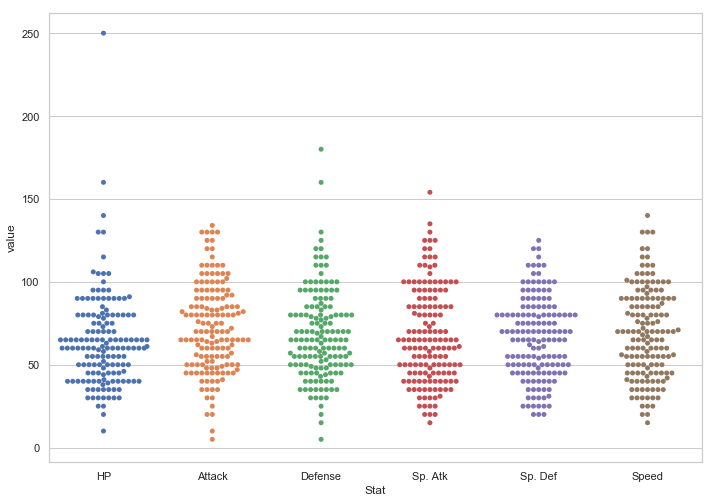

In [30]:
sns.swarmplot(x='Stat', y='value', data=melted_pokemon)

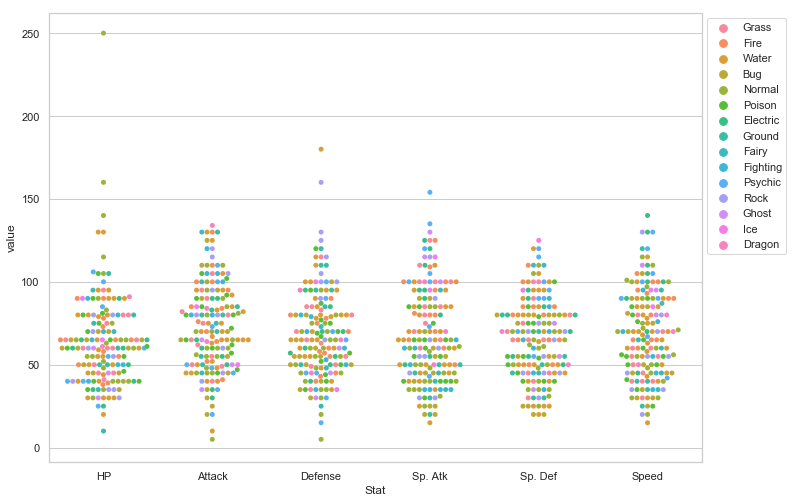

In [31]:
sns.swarmplot(x='Stat', y='value', data=melted_pokemon, hue='Type 1')
plt.legend(bbox_to_anchor=(1, 1), loc=2)